In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
import pandas as pd
import sys
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
def get_prob_maps_list(prob_map):
    num_classes = 13
    probs_list = []

    for i in prob_map.items():

        for label in range(num_classes):
            probs_list.append(i[1][label][0])

    prob_img = np.zeros((num_classes, 691, 691))
    _, rows, cols = prob_img.shape

    for i in range(rows):
        for j in range(cols):

            prob_img[:, i, j] = np.array([probs_list[label][i, j] for label in range(num_classes)])

    return prob_img

In [3]:
def calculate_ece(y_true, y_pred, num_bins=10):
        
    pred_y = np.argmax(y_pred, axis=-1)
    correct = (pred_y == y_true.astype(np.float32))
    prob_y = np.max(y_pred, axis=-1)

    b = np.linspace(start=0, stop=1.0, num=num_bins)
    bins = np.digitize(prob_y, bins=b, right=True)

    o = 0
    confidences = []
    accuracies = []
    for b in range(num_bins):
        mask = bins == b
        if np.any(mask):
            accuracy = np.mean(correct[mask])
            confidence = np.mean(prob_y[mask])
            accuracies.append(accuracy)
            confidences.append(confidence)
            o += np.abs(np.sum(correct[mask] - prob_y[mask]))

    print(o / y_pred.shape[0])

    return accuracies, confidences

# def calculate_sce(y_true, y_pred, num_bins=10):
    
#     classes = y_pred.shape[-1]
    
#     for cur_class in range(classes):
#         correct = (cur_class == y_true).astype(np.float32)
#         plt.hist(correct)
#         prob_y = y_pred[..., cur_class]

#         b = np.linspace(start=0, stop=1.0, num=num_bins)
#         bins = np.digitize(prob_y, bins=b, right=True)
        
#         o = 0
#         confidences = []
#         accuracies = []
#         for b in range(num_bins):
#             mask = bins == b
#             if np.any(mask):
#                 accuracy = np.mean(correct[mask])
#                 confidence = np.mean(prob_y[mask])
#                 accuracies.append(accuracy)
#                 confidences.append(confidence)
#                 o += np.abs(np.sum(correct[mask] - prob_y[mask]))

#     print(o / (y_pred.shape[0] * classes))

#     return accuracies, confidences

In [4]:
def reliability_diagram(x, y):

    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    plt.plot(x, y, "s-", label="CNN")

    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.title("Reliability diagram / calibration curve")

    plt.tight_layout()
    plt.show()

Checking  NLDAMPH0005_1_frame0_003.npz NLDAMPH0005_1_frame0_003.nii.gz
0.26167977045426233


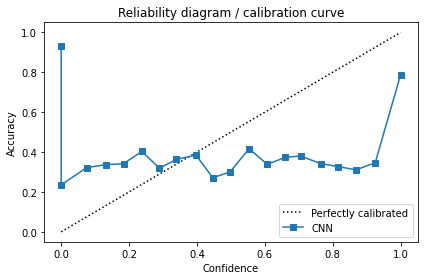

Checking  NLDAMPH0005_1_frame120_003.npz NLDAMPH0005_1_frame120_003.nii.gz
0.27949953289052815


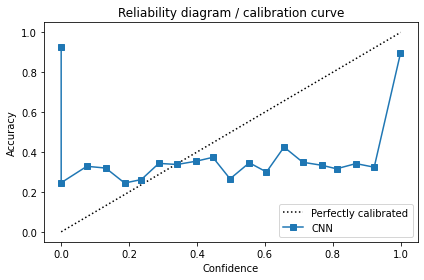

Checking  NLDAMPH0005_1_frame160_003.npz NLDAMPH0005_1_frame160_003.nii.gz
0.2641683269304186


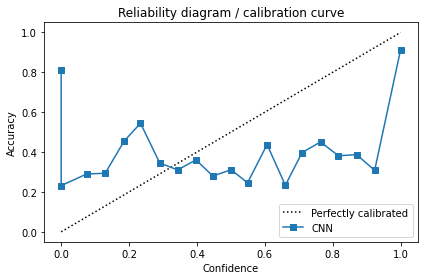

Checking  NLDAMPH0005_1_frame200_003.npz NLDAMPH0005_1_frame200_003.nii.gz
0.21935290986341097


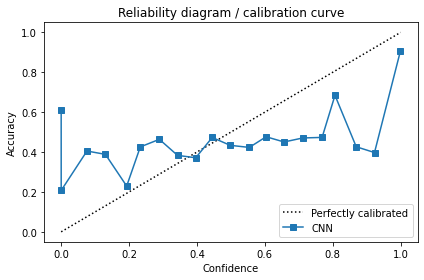

Checking  NLDAMPH0005_1_frame240_003.npz NLDAMPH0005_1_frame240_003.nii.gz
0.2493251094461227


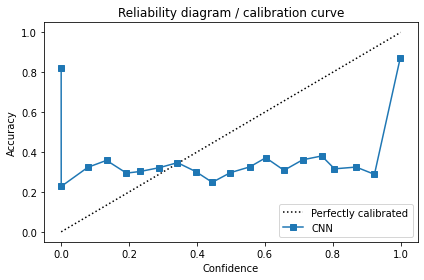

Checking  NLDAMPH0005_1_frame268_003.npz NLDAMPH0005_1_frame268_003.nii.gz
0.21299052538147215


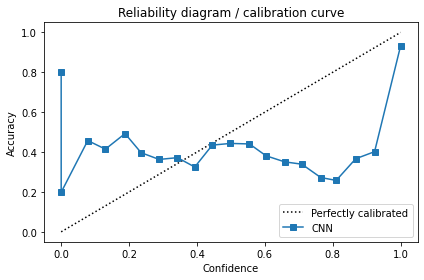

Checking  NLDAMPH0005_1_frame280_003.npz NLDAMPH0005_1_frame280_003.nii.gz
0.20857048346197332


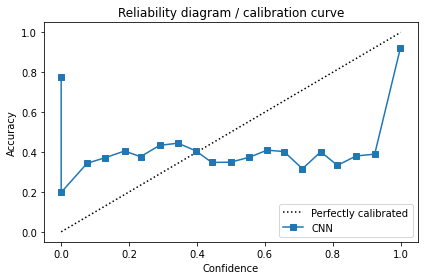

Checking  NLDAMPH0005_1_frame320_003.npz NLDAMPH0005_1_frame320_003.nii.gz
0.23166405400675588


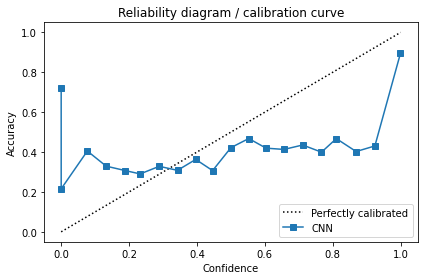

Checking  NLDAMPH0005_1_frame360_003.npz NLDAMPH0005_1_frame360_003.nii.gz
0.27930932215455234


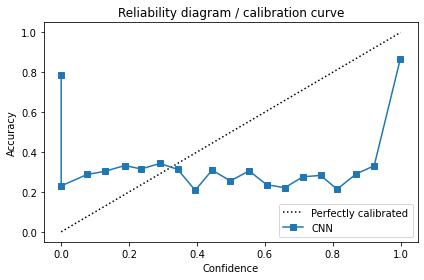

Checking  NLDAMPH0005_1_frame400_003.npz NLDAMPH0005_1_frame400_003.nii.gz
0.2728548453935002


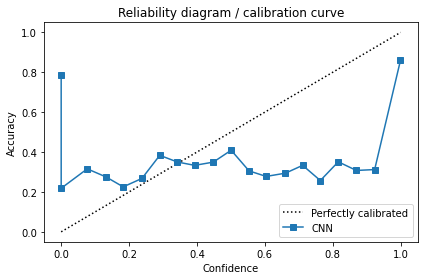

Checking  NLDAMPH0005_1_frame40_003.npz NLDAMPH0005_1_frame40_003.nii.gz
0.2585259744046458


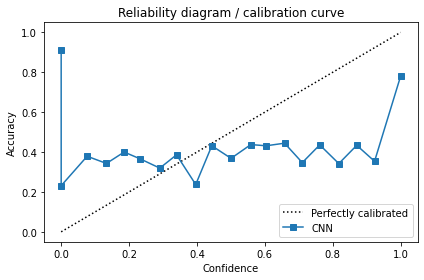

Checking  NLDAMPH0005_1_frame440_003.npz NLDAMPH0005_1_frame440_003.nii.gz
0.2823393388195663


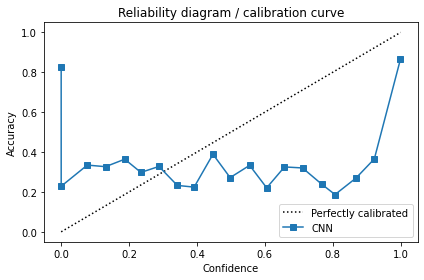

Checking  NLDAMPH0005_1_frame449_003.npz NLDAMPH0005_1_frame449_003.nii.gz
0.2838646958326193


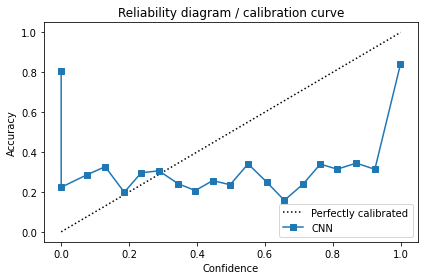

Checking  NLDAMPH0005_1_frame480_003.npz NLDAMPH0005_1_frame480_003.nii.gz
0.23892722207397032


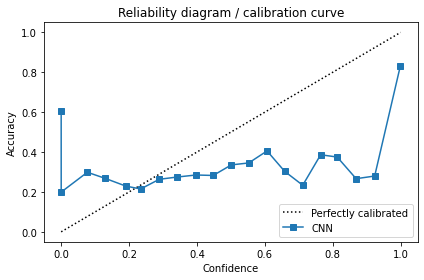

Checking  NLDAMPH0005_1_frame520_003.npz NLDAMPH0005_1_frame520_003.nii.gz


KeyboardInterrupt: 

In [6]:
preds_path = r'Z:\grodriguez\CardiacOCT\preds-test-set\model7_preds'
orig_path = r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task507_CardiacOCT\labelsTs'

preds_list = os.listdir(preds_path)
orig_list = os.listdir(orig_path)

for orig in orig_list:

    frame_name = orig.split('.')[0]
    files_for_frame = []

    for pred in preds_list:
        
        if frame_name in pred:
            files_for_frame.append(pred)

    npz_file = [npz for npz in files_for_frame if npz.endswith('npz')][0]
    nifti_file = [nifti for nifti in files_for_frame if nifti.endswith('nii.gz')][0]

    print('Checking ', npz_file, nifti_file)
    pred_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\preds-test-set\predicted_results_model4_2d_with_maps\{}'.format(nifti_file))
    pred_seg_data = sitk.GetArrayFromImage(pred_seg)[0]
    orig_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task504_CardiacOCT\labelsTs\{}'.format(nifti_file))
    orig_seg_data = sitk.GetArrayFromImage(orig_seg)[0]
    prob_map = np.load(r'Z:\grodriguez\CardiacOCT\preds-test-set\predicted_results_model4_2d_with_maps\{}'.format(npz_file))

    
    prob_img = get_prob_maps_list(prob_map)

    true_seg_crop = orig_seg_data[6:697, 6:697]
    pred_seg_crop = pred_seg_data[6:697, 6:697]

    accuracies, confidences = calculate_ece(true_seg_crop.reshape(-1), prob_img.reshape(691*691, 13), 20)
    reliability_diagram(confidences, accuracies)
